In [1]:
import sys
print(sys.executable)

C:\Users\Bhawna\Anaconda3\Anaconda\python.exe


In [2]:
import pandas as pd
import numpy as np
from IPython.display import Image, HTML
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from gensim.models import Word2Vec

In [3]:
col_entries = ['Id','User', 'Stay', 'Stay Length', 'Numeric_Stay_Length', 'Location_id', 'Location', 'Feature_of_Attraction', 'Region', 'Category_Trip_Expenses', 'Trip_Expenses', 'Class','Ticket_Prices', 'Total_Expenses','Time_of_the_Year', 'Circumambience_id', 'Circumambience', 'People']
df=pd.read_excel("Travel_H.xlsx", names=col_entries, header=None, sheet_name='Sheet5')
df.head(10)
df.drop([0])

,Id,User,Stay,Stay Length,Numeric_Stay_Length,Location_id,Location,Feature_of_Attraction,Region,Category_Trip_Expenses,Trip_Expenses,Class,Ticket_Prices,Total_Expenses,Time_of_the_Year,Circumambience_id,Circumambience,People
1,1,261,4,1 month,30,34,Bordeaux,Historical,Europe,1,5640,2,12000,17640,Summer,2,Family,4
2,2,134,2,1 week,7,57,London,Modern,Europe,3,3808,1,1150,4958,Summer,1,Solo,1
3,3,173,3,2 weeks,14,33,Copenhagen,Historical,Europe,3,12656,2,3920,16576,Summer,3,Romantic,2
4,4,90,3,2 weeks,14,38,Athens,Historical,Europe,1,924,1,2200,3124,Summer,3,Romantic,2
5,5,208,1,3 days,3,58,Manchester,Modern,Europe,2,2076,2,5360,7436,Summer,2,Family,4
6,6,156,1,3 days,3,28,Seattle,Modern,North America,2,2772,1,1200,3972,Summer,4,Friends,6
7,7,75,1,3 days,3,48,Lisbon,Historical,Europe,3,1374,1,2440,3814,Summer,3,Romantic,2
8,8,194,3,2 weeks,14,9,Broward County,Beach,North America,2,2198,1,130,2328,Summer,1,Solo,1
9,9,183,2,1 week,7,20,Oakland,Modern,North America,2,1484,1,720,2204,Spring,3,Romantic,2
10,10,204,4,1 month,30,43,Milan,Modern,Europe,3,8310,2,1820,10130,Summer,1,Solo,1


In [4]:
user_vec = df.loc[df['Location']=='Barcelona'][['User','Numeric_Stay_Length','Category_Trip_Expenses','Circumambience_id']][:20]
print(user_vec)

    User Numeric_Stay_Length Category_Trip_Expenses Circumambience_id
46   271                  14                      2                 1
134   91                   7                      3                 1
182   79                   3                      3                 2
245   10                  30                      2                 2
278   17                  14                      3                 4
280   80                  14                      1                 3
328   37                   3                      2                 3
375  146                   7                      3                 1
390   80                  30                      1                 2
622  294                  30                      1                 3
633   15                   3                      3                 2
641  131                   3                      1                 1
659   43                  14                      2                 4
727   45            

In [5]:
# Importing the dataset
#listings = pd.read_csv('Barcelona.csv', usecols = ['id', 'name', 'description'])
# listings = pd.read_csv('Barca.csv')
# listings.head(10)


In [6]:
# sd = pd.read_csv('calendar.csv',usecols=[0,3,6])
# sd.columns = ['id','price','maxStay']
# sd = sd.drop_duplicates(subset='id')
# listings = pd.read_csv('Barcelona.csv',usecols=[0,4,7])
# listings = listings.merge(sd[['id','price','maxStay']],how='left').fillna('')

In [7]:
# listings.head(10)

In [8]:
# def data():
#     listings['name'] = listings['name'].astype('str')
#     listings['description'] = listings['description'].astype('str')
#     listings['price'] = listings['price'].astype('str')
#     listings['maxStay'] = listings['maxStay'].astype('str')
#     name_corpus = ' '.join(listings['name'])
#     description_corpus = ' '.join(listings['description'])
#     price_corpus = ' '.join(listings['price'])
#     maxStay_corpus = ' '.join(listings['maxStay'])
#     name_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white', height = 2000, width = 4000).generate(name_corpus)
#     plt.figure(figsize = (16,8))
#     plt.imshow(name_wordcloud)
#     plt.axis('off')
#     plt.show()
#     description_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white', height = 2000, width = 4000).generate(description_corpus)
#     plt.figure(figsize = (16,8))
#     plt.imshow(description_wordcloud)
#     plt.axis('off')
#     plt.show()
#     listings['content'] = listings[['name', 'description', 'price', 'maxStay']].astype(str).apply(lambda x: ' // '.join(x), axis = 1)
#     listings['content'].fillna('Null', inplace = True)
#     tf = TfidfVectorizer(analyzer = 'word', ngram_range = (1, 2), min_df = 0, stop_words = 'english')
#     tfidf_matrix = tf.fit_transform(listings['content'])
#     cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)
#     results = {}
#     for idx, row in listings.iterrows():
#         similar_indices = cosine_similarities[idx].argsort()[:-100:-1]
#         similar_items = [(cosine_similarities[idx][i], listings['id'][i]) for i in similar_indices]
#         results[row['id']] = similar_items[1:]
    
#     def item(id):
#         name   = listings.loc[listings['id'] == id]['content'].tolist()[0].split(' // ')[0]
#         desc   = ' \nDescription: ' + listings.loc[listings['id'] == id]['content'].tolist()[0].split(' // ')[1][0:165] + '...'
#         #price = listings.loc[listings['id'] ==id]['content'].tolist()[0]
#         prediction = name  + desc
#         return prediction

#     def recommend(item_id, num):
#         print('Recommending ' + str(num) + ' products similar to ' + item(item_id))
#         print('---')
#         recs = results[item_id][:num]
#         for rec in recs:
#             print('\nRecommended: ' + item(rec[1]) + '\n(score:' + str(rec[0]) + ')')
#     recommend(item_id = , num = 5) 

In [9]:
# Importing the libraries
import pandas as pd
from IPython.display import Image, HTML
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [10]:
# Importing the dataset

sd = pd.read_csv('calendar.csv',usecols=[0,3,6])
sd.columns = ['id','price','maxStay']
sd = sd.drop_duplicates(subset='id')
listings = pd.read_csv('Barcelona.csv',usecols=[0,4,7])
listings = listings.merge(sd[['id','price','maxStay']],how='left').fillna('')
listings.head(10)

,id,name,description,price,maxStay
0,18666,Flat with Sunny Terrace,"Apartment located near the ""Plaza de las Glori...",$130.00,730
1,18674,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,$99.00,1125
2,23197,FORUM DELUXE 5 MINS WALK CCIB CENTER & SEA!,"Beautiful apartment, large terrace, 5 min walk...",$180.00,180
3,25786,NICE ROOM AVAILABLE IN THE HEART OF GRACIA,JUST GO THROUGH THE MANY REVIEWS I GOT THROUGH...,$36.00,730
4,31377,"Room for 2, Sagrada Famili",The room in 500 m from Sagrada Familia. 3 bran...,$53.00,1125
5,31380,"Room for 2-3. Barcelona, Sagrada Famili","Room for 2-3. Great location, right next to S...",$68.00,1125
6,31958,"Gaudi Attic 1, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...",$84.00,27
7,32471,"Gaudi Attic 2, Friendly Rentals","This apartment has: 2 double beds, 1 single be...",$98.00,27
8,32711,Sagrada Familia area - Còrsega 1,A lovely two bedroom apartment only 250 m from...,$93.00,31
9,34981,VIDRE HOME PLAZA REAL on LAS RAMBLAS,Spacious apartment for large families or group...,$300.00,365


In [11]:
listings['name'] = listings['name'].astype('str')
listings['description'] = listings['description'].astype('str')
listings['price'] = listings['price'].astype('str')
listings['maxStay'] = listings['maxStay'].astype('str')

In [12]:
name_corpus = ' '.join(listings['name'])
description_corpus = ' '.join(listings['description'])
price_corpus = ' '.join(listings['price'])
maxStay_corpus = ' '.join(listings['maxStay'])

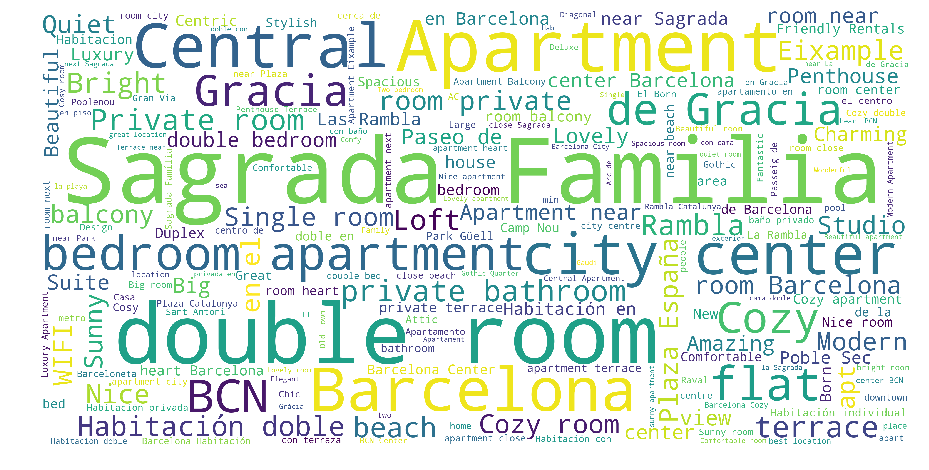

In [13]:
name_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white', height = 2000, width = 4000).generate(name_corpus)
plt.figure(figsize = (16,8))
plt.imshow(name_wordcloud)
plt.axis('off')
plt.show()

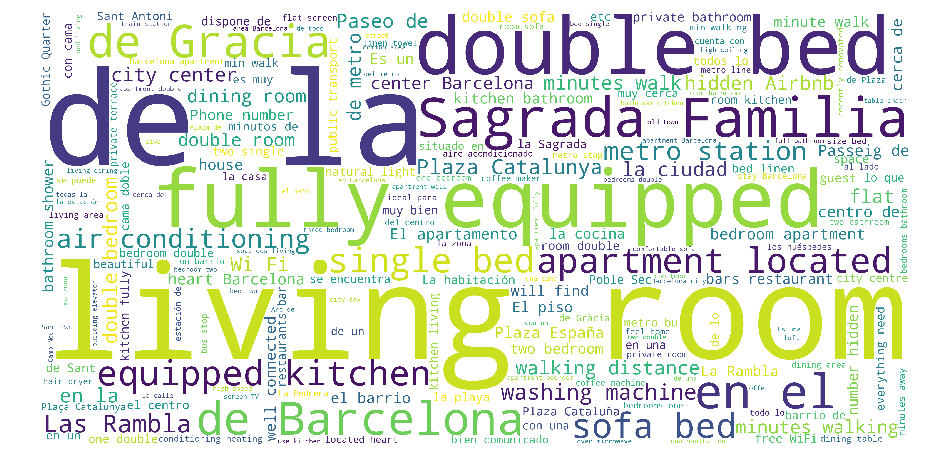

In [14]:
description_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white', height = 2000, width = 4000).generate(description_corpus)
plt.figure(figsize = (16,8))
plt.imshow(description_wordcloud)
plt.axis('off')
plt.show()

In [15]:
listings['content'] = listings[['name', 'description', 'price', 'maxStay']].astype(str).apply(lambda x: ' // '.join(x), axis = 1)

In [16]:
listings['content'].fillna('Null', inplace = True)

In [17]:
tf = TfidfVectorizer(analyzer = 'word', ngram_range = (1, 2), min_df = 0, stop_words = 'english')
tfidf_matrix = tf.fit_transform(listings['content'])

In [18]:
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

In [19]:
results = {}
for idx, row in listings.iterrows():
    similar_indices = cosine_similarities[idx].argsort()[:-100:-1]
    similar_items = [(cosine_similarities[idx][i], listings['id'][i]) for i in similar_indices]
    results[row['id']] = similar_items[1:]

In [20]:
def item(id):
    name   = listings.loc[listings['id'] == id]['content'].tolist()[0].split(' // ')[0]
    desc   = ' \nDescription: ' + listings.loc[listings['id'] == id]['content'].tolist()[0].split(' // ')[1][0:165] + '...'
    prediction = name  + desc
    return prediction

def recommend(item_id, num):
    print('Recommending ' + str(num) + ' products similar to ' + item(item_id))
    print('---')
    recs = results[item_id][:num]
    for rec in recs:
        print('\nRecommended: ' + item(rec[1]) + '\n(score:' + str(rec[0]) + ')')

In [21]:
# tefd = user_vec['Numeric_Stay_Length'].astype('|S')
# for x in tefd.head(10):
#     x = x.decode("utf-8")
#     print(type(x))

In [22]:
#user_vec['Numeric_Stay_Length']=user_vec['Numeric_Stay_Length'].astype('str')
#tmp = listings[user_vec['Numeric_Stay_Length'].le(listings['maxStay'],level=None, fill_value=None, axis=0)]
# tmp = listings.query("maxStay < '100' ")
# tmp.head(10)

In [23]:
# sentences = [["cat", "say", "meow"], ["dog", "say", "woof"]]
# model = Word2Vec(sentences, min_count=1)
def user_item_map(listings,stay_length):
    #tmp = listings[user_vec['Numeric_Stay_Length'].le(listings['maxStay'],level=None, fill_value=None, axis=0)]
    listings =  listings.query("maxStay < 'stay_length' ")  
    return listings.iloc[np.random.choice(np.arange(len(listings)),1,False)]['id'].values[0]

In [24]:
for idx, row in user_vec.iterrows():
    if row['Category_Trip_Expenses'] ==1:
        tmp = listings.iloc[:5936]
    elif row['Category_Trip_Expenses'] ==2:
        tmp = listings.iloc[5936: 11872]
    else:
        tmp = listings.iloc[11872:]
    #item_id = user_item_map(tmp,row['Numeric_Stay_Length'].astype('|S').decode("utf-8"))
#     print(row['Numeric_Stay_Length'])
    item_id = user_item_map(tmp,row['Numeric_Stay_Length'])
    recommend(item_id, num = 5)

14
Recommending 5 products similar to Sunny Penthouse w balcony directly on beachfront 
Description: Important only 2-8 months rental! Probably the best located studio apartment on the Barceloneta beachfront with lots of sunlight and  180 degree views of sea/beachfr...
---

Recommended: CARMEN SUNNY BEACHFRONT POOL 
Description: SUNNY BEACHFRONT POOL Barcelona Apartment for rent : Sunny three bedroom apartment (135m2), surrounded by an enormous park (Diagonal Mar) along the beach! Beautiful ...
(score:0.07390243625058765)

Recommended: Stylish central apartment with balcony 
Description: This beautiful apartment is newly renovated, light and airy with lofty Catalan vaulted ceilings. There are two bedrooms with two double beds with the front one openi...
(score:0.0669659370445008)

Recommended: 2489 - AB Barceloneta Vinaros Street IV - Modern apartment for 2 people on the beach 
Description: This modern refurbished apartment contains one bedroom, sleeping up to 2 people, and is neutrall

Recommending 5 products similar to 1 double room right in the city centre (Gotico) 
Description: It is a charming apartment located in the city centre. It has great public transport connections all around and it's only a 15 minute walk to the beach! Lots of shop...
---

Recommended: Arc del Triomf - Double room in an authentic flat! 
Description: Double bedroom in a central, authentic Catalonian apartment located in Arc del Triomf. The room has a double bed, a fan, nightstands and a big wardrobe. The apartmen...
(score:0.18890233616599078)

Recommended: Arc del Triomf - Big double room in authentic flat 
Description: Spacious double bedroom in a central, authentic Catalonian apartment located in Arc del Triomf. The room has a double bed, a fan, nightstands, a big wardrobe with mi...
(score:0.1883001374816313)

Recommended: Large Double room, CITY CENTRE BCN. Luxury flat 
Description: I have a very large spacious double bedroom with a terrace and natural sunlight.  Sharing a large livin

In [25]:
# price_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white', height = 2000, width = 4000).generate(price_corpus)
# plt.figure(figsize = (16,8))
# plt.imshow(price_wordcloud)
# plt.axis('off')
# plt.show()

In [26]:
# listings_2 = pd.read_csv('calendar.csv', usecols = ['listing_id','price'])
# listings_2.columns=['id', 'price']
# listings_2.head(10)
# listings_2 = listings_2.dropna(axis=1)
# merged = listings.merge(listings_2, on='id')
# merged.to_csv("output.csv", index=False)

In [27]:
listings_3 = pd.read_csv('output.csv')
listings_3.head(10)

,id,name,description,price_x,content,price_y
0,17806078,habitacion,hola gatinho,7.0,habitacion // hola gatinho,$7.00
1,17806078,habitacion,hola gatinho,7.0,habitacion // hola gatinho,$7.00
2,17806078,habitacion,hola gatinho,7.0,habitacion // hola gatinho,$7.00
3,17806078,habitacion,hola gatinho,7.0,habitacion // hola gatinho,$7.00
4,17806078,habitacion,hola gatinho,7.0,habitacion // hola gatinho,$7.00
5,17806078,habitacion,hola gatinho,7.0,habitacion // hola gatinho,$7.00
6,17806078,habitacion,hola gatinho,7.0,habitacion // hola gatinho,$7.00
7,17806078,habitacion,hola gatinho,7.0,habitacion // hola gatinho,$7.00
8,17806078,habitacion,hola gatinho,7.0,habitacion // hola gatinho,$7.00
9,17806078,habitacion,hola gatinho,7.0,habitacion // hola gatinho,$7.00


In [28]:
from gensim.models import Word2Vec
sentences = [["cat", "say", "meow"], ["dog", "say", "woof"]]
model = Word2Vec(sentences, min_count=1)

In [29]:
print(model)

Word2Vec(vocab=5, size=100, alpha=0.025)
